## Machine Learning & Data Mining process

* Data collection
* Data preprocessing
* train-test split
* model generation
* evaluation

# Naive Bayes Classification

* classification method based on Bayes Theorem
* works faster on larger dataset
* effectively deployed in text mining applications

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Dataset/Diabetes.csv")

In [3]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
feature_columns = ['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree', 'age']
features = data[feature_columns]     # independent variable
target = data.label                  # dependent variable

In [5]:
# partition data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)


### Implementing the Model

In [6]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

### Evaluating the model

In [7]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [8]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

Accuracy:  0.7748917748917749
Precision:  0.7391304347826086
Recall:  0.6
F1-Score:  0.6623376623376623


# Decision Tree Classification 

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


### Evaluating the model

In [10]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

Accuracy:  0.6666666666666666
Precision:  0.5512820512820513
Recall:  0.5058823529411764
F1-Score:  0.5276073619631901


# KNN Classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [12]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

Accuracy:  0.7532467532467533
Precision:  0.7058823529411765
Recall:  0.5647058823529412
F1-Score:  0.6274509803921569


# SVM Classification

In [13]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [14]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

Accuracy:  0.7835497835497836
Precision:  0.7868852459016393
Recall:  0.5647058823529412
F1-Score:  0.6575342465753424


In [24]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for performance evaluation

# instantiate the model
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train,y_train)
# Forecast the target variable for given test dataset
y_pred = logreg.predict(x_test)




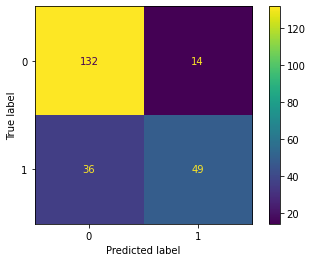

In [25]:
# Import the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

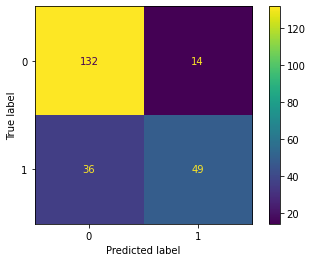

In [26]:
ConfusionMatrixDisplay.from_estimator(logreg, x_test, y_test)
plt.show()

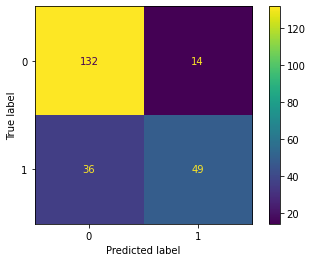

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

<img src='confusion_matrix.jpeg'>

In [28]:
# import classification report
from sklearn.metrics import classification_report
# Create classification report
print(classification_report(y_test, y_pred, target_names=['Yes(1)','No(0)']))


              precision    recall  f1-score   support

      Yes(1)       0.79      0.90      0.84       146
       No(0)       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



[]

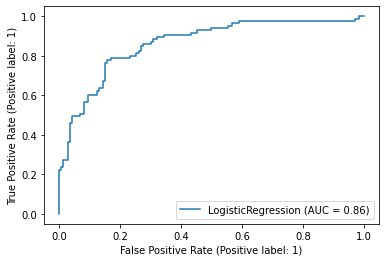

In [34]:
# import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg, x_test, y_test)
plt.plot()

[]

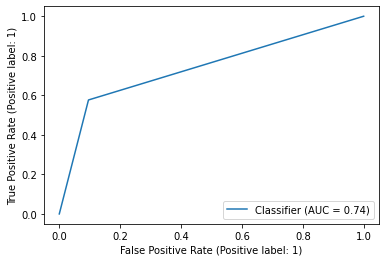

In [35]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot()

In [36]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

predictions_prob = logreg.predict_proba(x_test)[::,1]
# Compute the area under ROC curve
auc = roc_auc_score(y_test, predictions_prob)
# Print auc value
print("Area Under Curve: ",auc)

Area Under Curve:  0.8628525382755843
